DATA MINING & ANALYTICS (2024)

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [ ]:
NAME = "Bingbing Ma"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully.**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments).
    - This can typically look like taking in another argument `random_state = 42` when applicable.
- The points allotted per question is listed.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers themselves.
- If a question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out!
- You can delete the `raise NotImplementedError()` when you are attempting the question.
- **Submitting the assignment** : Save your work as a PDF (Print -> Save as PDF), download the `.ipynb` file from Colab (Download -> Download as .ipynb), and upload these two files to Gradescope. **Run all cells before submitting.**
- **MAKE A COPY OF THIS FILE FOR YOURSELF TO EDIT/SAVE.**
- That's about it. Happy coding!

In [ ]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

#DOWNLOADING DATASET
!wget -nc http://quadro.ist.berkeley.edu:1331/yelp_reviewers.csv
# !unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv', delimiter= ',')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

File ‘yelp_reviewers.csv’ already there; not retrieving.

Dataset Downloaded: yelp_reviewers.csv
                q3           q4           q5           q6           q7  \
count  7177.000000  7177.000000  7177.000000  7177.000000  7177.000000   
mean      6.838651     5.281455     4.750871     8.808973     1.539160   
std       7.597977    16.208703    13.866352    19.980443     0.885421   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       3.000000     1.000000     1.000000     2.000000     1.100000   
50%       5.000000     2.000000     2.000000     5.000000     1.610000   
75%       9.000000     4.000000     4.000000     9.000000     2.200000   
max     252.000000   607.000000   474.000000   773.000000     5.530000   

                q8           q9          q10          q11          q12  ...  \
count  7177.000000  7177.000000  7177.000000  7177.000000  7177.000000  ...   
mean      0.934928     0.870281     1.549898    26.732782    25.660616  ...   

In [ ]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0.0,0.0,0.0,0.0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0.0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. (hint: take a look at `silhouette_score`).


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters. The preferred approach for this lab is to treat the empty clusters as “singletons”, leaving them empty with single point placeholders (so no need to drop anything for the purposes of the lab).

For KMeans use argument **n_init = 10** when applicable, n_init is the number of times the KMeans algorithm is run with different centroid seeds.


In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q1(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  scores = []
  X = df.loc[:, ['q4', 'q5', 'q6']]
  for k in np.arange(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    # kmeans.predict(X)
    labels = kmeans.labels_
    scores.append(silhouette_score(X, labels))
  best_k = np.arange(2, 9)[np.argmax(scores)]
  return best_k

  # raise NotImplementedError()

print(q1(df))

2


What is the best choice of k?

In [ ]:
# The best choice of k is 2.

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8.

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q7-q10), then replace the missing values with 0. We do this since the missing values from q7-q10 are most commonly because of taking the log's of values of 0 from q3-q6.

For KMeans use argument **n_init = 10** when applicable.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q2(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  scores = []
  X = df.loc[:, ['q7', 'q8', 'q9', 'q10']].fillna(0)
  for k in np.arange(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    scores.append(silhouette_score(X, labels))
  best_k = np.arange(2, 9)[np.argmax(scores)]
  return best_k



  raise NotImplementedError()

print(q2(df))

2


What is the best choice of k?

In [ ]:
# The best choice of k is 2.

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8.

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q11-q13), then drop rows that have missing values.

For KMeans use argument **n_init = 10** when applicable

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q3(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  scores = []
  X = df.loc[:, ['q11', 'q12', 'q13']].dropna()
  for k in np.arange(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    scores.append(silhouette_score(X, labels))
  best_k = np.arange(2, 9)[np.argmax(scores)]
  return best_k

  raise NotImplementedError()

print(q3(df))

8


What is the best choice of k?

In [ ]:
# The best choice of k is 8.

### Question 4 `(1 point)`
Take the best clustering (i.e., best value of K) from Question 3 and using the same subset of data from q11-q13, list the number of data points in each cluster. **Return your answer in dictionary form (i.e. `ans = {0: 100, 1: 200, ...}`).**

For KMeans use argument **n_init = 10** when applicable

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an dictionary. Eg : {0:1000,1:500,2:1460}.
def q4(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df.loc[:, ['q11', 'q12', 'q13']].dropna()
  kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
  kmeans.fit(X)
  labels = kmeans.labels_
  # print(labels)
  unique, counts = np.unique(labels, return_counts=True)
  return dict(zip(unique, counts))

  raise NotImplementedError()

In [ ]:
#This is an graded cell, do not edit
print(q4(df))

{0: 9862, 1: 5728, 2: 1228, 3: 1632, 4: 3037, 5: 2108, 6: 4449, 7: 2065}


### Question 5 `(1 point)`
Consider the best clustering from Question 3. Were there clusters that represented very **useful** but **not funny** reviewers (check column definitions for columns corresponding to funny, useful, etc.)?  If so, print the center of that cluster.

For KMeans use argument **n_init = 10** when applicable

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a list. Eg : [10, 30, 54].
def q5(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df.loc[:, ['q11', 'q12', 'q13']].dropna()
  kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
  kmeans.fit(X)
  labels = kmeans.labels_

  cluster_centers = kmeans.cluster_centers_
  max_diff = float('-inf')
  for c, f, u in cluster_centers:
    diff = u - f
    if diff > max_diff:
      max_diff = diff
      max = [c,f,u]
  return max


  # raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

[ 0.3  0.2 99.5]


### Question 6 `(1 point)`
Consider the best clustering from Question 3. What was the centroid of the cluster that represented relatively uniform strength in all voting categories?

For KMeans use argument **n_init = 10** when applicable.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a centroid in list form. Eg : [10, 10.5, 13].
def q6(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df.loc[:, ['q11', 'q12', 'q13']].dropna()
  kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
  kmeans.fit(X)
  labels = kmeans.labels_

  cluster_centers = kmeans.cluster_centers_
  uniform = []


  for i in cluster_centers:
    variance = i.var()
    uniform.append(variance)
  return cluster_centers[np.argmin(uniform)]




  raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(q6(df))

[31.35819374 30.45207379 38.18705718]


### Question 7 `(1 point)`
Cluster the dataset using $k = 7$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

As before, fill NaN values in q7-q10 with 0, but drop rows that have NaN values from q11-q15. For KMeans use argument **n_init = 10** when applicable

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a float.
def q7(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.

  X = df.loc[:, ['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']]
  X[['q7', 'q8', 'q9', 'q10']] = X[['q7', 'q8', 'q9', 'q10']].fillna(0)
  X = X.dropna(subset=['q11', 'q12', 'q13', 'q14', 'q15'])
  kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
  kmeans.fit(X)
  labels = kmeans.labels_
  return silhouette_score(X, labels)


  # raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(q7(df))

0.4757489954135929


### Question 8 `(1 point)`
Cluster the dataset using $k = 7$ and using features q7-q15 (refer to the column descriptions if needed).

What is the average q3 value in each of the clusters? Replace/fill NaN values for q7-q15 as you have done for previous questions.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an Array. Eg : [10, 30, 54].
def q8(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df.loc[:, ['q3', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']]
  X[['q7', 'q8', 'q9', 'q10']] = X[['q7', 'q8', 'q9', 'q10']].fillna(0)
  X = X.dropna(subset=['q11', 'q12', 'q13', 'q14', 'q15'])

  kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
  kmeans.fit(X)
  labels = kmeans.labels_

  cluster_centers = kmeans.cluster_centers_
  data = pd.DataFrame({'q3': X['q3'], 'cluster': labels})

  average = data.groupby('cluster')['q3'].mean().tolist()
  return average

  # raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

[4.6 3.8 3.6 4.6 1.4 2.5 4.8]


### Question 9 `(2 points)`

We will now cluster the dataset using all features in the dataset.

We can drop features with high incidents of `-inf` / `NaN` / blank values. We will also perform some form of normalization on these features so as not to over bias the clustering towards the larger magnitude features.

Let's go ahead and get started.


#### Data Cleansing and Normalization ####
**Check how many null values there are in each column.**

In [ ]:
# YOUR CODE HERE
df.isnull().sum()


,0
user_id,0
q3,0
q4,0
q5,0
q6,0
q7,0
q8,35280
q9,36743
q10,24338
q11,21383


It looks like q8 - q13 and q16ab have a lot of null values. Let's see what the impact is of removing the two columns with the most null values.

**Drop the two columns with the most NaN values, and then remove all rows with NaN values remaining.**

In [ ]:
# YOUR CODE HERE
null = df.isnull().sum()
new_df = df.drop(null.nlargest(2).index, axis = 1).dropna()
new_df

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,...,no,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,...,no,1.000000,22,6,0.000000,46.500000,0,3,0.000000,3.000000
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,...,no,1.000000,37,5,0.000498,197.000000,0,0,0.000000,5.000000
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,...,no,1.400000,14,18,0.001578,167.000000,1,0,1.250000,3.600000
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,...,no,0.500000,3,30,0.009861,91.552083,1,13,4.000000,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,09cpNEc8L-jr9R8-e7cJuA,6,1,2,2,1.79,0.69,20.00,40.00,40.00,...,no,1.166667,10,16,0.001286,362.916667,0,0,2.500000,2.666667
69511,OrtDTPj1J2injmWcHyTyWw,3,1,2,8,1.10,2.08,9.09,18.18,72.73,...,no,0.666667,25,13,0.003016,60.111111,1,0,1.333333,4.333333
77193,RjjsMfDoxbwMVPi-DLvftQ,19,2,2,7,2.94,1.95,18.18,18.18,63.64,...,yes,0.315789,12,62,0.018841,41.166667,0,3,0.500000,3.263158
88687,W21PBCWu59Bo5LRv9-sYNg,8,0,1,5,2.08,1.61,0.00,16.67,83.33,...,no,0.250000,34,31,0.000000,36.041667,0,0,0.347826,3.875000


By removing two features, we have effectively doubled the number of rows remaining than if we just removed all rows with a NaN value. That's pretty good.  

Now, let's preprocess categorical variables into dummy variables. (hint: look at `pd.get_dummies`).

In [ ]:
# YOUR CODE HERE

preprocess_df = pd.get_dummies(data=new_df, columns = ['q16s', 'q16t'])
preprocess_df

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,...,q16x,q16y,q16z,q16aa,q16ab,q16ac,q16s_experienced,q16s_freshman,q16t_no,q16t_yes
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,...,0.001755,91.072917,4,0,1.000000,4.875000,True,False,True,False
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,...,0.000000,46.500000,0,3,0.000000,3.000000,True,False,True,False
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,...,0.000498,197.000000,0,0,0.000000,5.000000,True,False,True,False
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,...,0.001578,167.000000,1,0,1.250000,3.600000,True,False,True,False
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,...,0.009861,91.552083,1,13,4.000000,3.750000,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,09cpNEc8L-jr9R8-e7cJuA,6,1,2,2,1.79,0.69,20.00,40.00,40.00,...,0.001286,362.916667,0,0,2.500000,2.666667,True,False,True,False
69511,OrtDTPj1J2injmWcHyTyWw,3,1,2,8,1.10,2.08,9.09,18.18,72.73,...,0.003016,60.111111,1,0,1.333333,4.333333,True,False,True,False
77193,RjjsMfDoxbwMVPi-DLvftQ,19,2,2,7,2.94,1.95,18.18,18.18,63.64,...,0.018841,41.166667,0,3,0.500000,3.263158,True,False,False,True
88687,W21PBCWu59Bo5LRv9-sYNg,8,0,1,5,2.08,1.61,0.00,16.67,83.33,...,0.000000,36.041667,0,0,0.347826,3.875000,True,False,True,False


Now, normalize the remaining values.

In [ ]:
ndf = preprocess_df.drop('user_id', axis=1)

In [ ]:
# YOUR CODE HERE

ndf.loc[:, :'q16ac'] = normalize(ndf.loc[:, :'q16ac'])

# ndf[numeric_cols] = (ndf[numeric_cols] - ndf[numeric_cols].mean()) / ndf[numeric_cols].std()
ndf

,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,...,q16x,q16y,q16z,q16aa,q16ab,q16ac,q16s_experienced,q16s_freshman,q16t_no,q16t_yes
47453,0.011846,0.002962,0.001481,0.011846,0.003080,0.003080,0.026920,0.013460,0.107696,0.014808,...,2.598811e-06,0.134857,0.005923,0.000000,0.001481,0.007219,True,False,True,False
53000,0.003713,0.001856,0.001856,0.003713,0.001281,0.001281,0.046410,0.046410,0.092821,0.018564,...,0.000000e+00,0.086323,0.000000,0.005569,0.000000,0.005569,True,False,True,False
64580,0.000492,0.000000,0.000000,0.000492,0.000000,0.000000,0.000000,0.000000,0.049250,0.002462,...,2.450239e-07,0.097022,0.000000,0.000000,0.000000,0.002462,True,False,True,False
84662,0.003793,0.000000,0.000000,0.003034,0.001221,0.001054,0.000000,0.000000,0.075862,0.004552,...,1.197059e-06,0.126690,0.000759,0.000000,0.000948,0.002731,True,False,True,False
50079,0.007589,0.007589,0.004743,0.012333,0.001973,0.002429,0.029191,0.018243,0.047434,0.008538,...,9.355195e-06,0.086853,0.000949,0.012333,0.003795,0.003558,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,0.002651,0.000442,0.000884,0.000884,0.000791,0.000305,0.008838,0.017676,0.017676,0.003977,...,5.684447e-07,0.160377,0.000000,0.000000,0.001105,0.001178,True,False,True,False
69511,0.003807,0.001269,0.002538,0.010153,0.001396,0.002640,0.011536,0.023073,0.092304,0.011422,...,3.827818e-06,0.076289,0.001269,0.000000,0.001692,0.005500,True,False,True,False
77193,0.068863,0.007249,0.007249,0.025371,0.010656,0.007068,0.065891,0.065891,0.230656,0.039868,...,6.828546e-05,0.149204,0.000000,0.010873,0.001812,0.011827,True,False,False,True
88687,0.025161,0.000000,0.003145,0.015726,0.006542,0.005064,0.000000,0.052430,0.262088,0.025161,...,0.000000e+00,0.113357,0.000000,0.000000,0.001094,0.012188,True,False,True,False


Using the the "sum of squared errors" metric along with the elbow method (make a graph and visually examine for the elbow), what is the best k to use for this dataset? (Hint: look at the `inertia_` attribute for k-means in sklearn).

In [ ]:
# The return value should be a graph to visualize the elbow method and the value of k determined from that graph.

# YOUR CODE HERE
# For KMeans use argument n_init = 10 when applicable.
X = ndf
lst = []
for k in np.arange(1, 20):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X)
  lst.append(kmeans.inertia_)

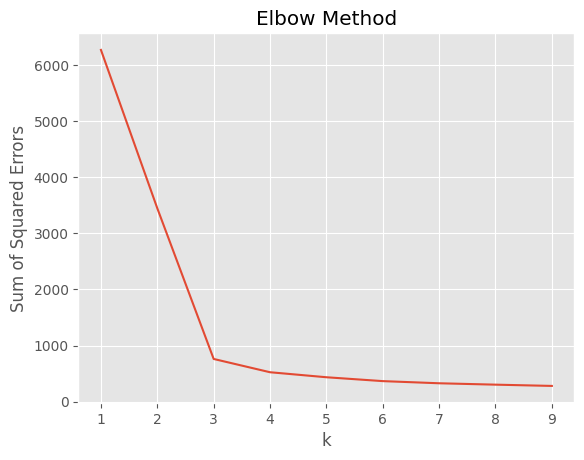

In [221]:

plt.plot(range(1, 10), lst[0:9])

plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method')
plt.grid(True)
plt.show()



```
# This is formatted as code
```

**Answer: The best k is 3.**

### Question 10 `(1 points)`
For this question, please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe the question you propose and how clustering can answer that question. Feel free to use additional cells if needed.


**Question: Consider the best clustering from Question 3. Were there clusters that represented very funny and very useful but not cool reviewers? If so, print the center of that cluster.**


In [ ]:
# YOUR CODE HERE
def q10(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df.loc[:, ['q11', 'q12', 'q13']].dropna()
  kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
  kmeans.fit(X)
  labels = kmeans.labels_

  cluster_centers = kmeans.cluster_centers_
  max_diff_1 = float('-inf')
  max_diff_2 = float('-inf')
  for c, f, u in cluster_centers:
    diff_1 = f - c
    diff_2 = u - c
    if diff_1 > max_diff_1:
      if diff_2 > max_diff_2:
        max_diff1 = diff_1
        max_diff2 = diff_2
        max = [c,f,u]
  return max
print(np.round_(q10(df), decimals=1, out=None))

[ 3.9 52.7 43.4]


### **Written Answer**

**Answer:** Yes, the center of the cluster would be [ 3.9 52.7 43.4].

## Bonus question (`2 Points`) - Reviewer overlap:

Now, let's take a look back at what we were doing last week, and use that in junction with what we've learned from above today.

For this bonus question, please:
- Download last week's dataset
- Aggregate cool, funny, and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed.


**You should be returning a dataframe with the following structure in the end:**

Rows: user IDs as indices.

Columns: boolean columns describing if the user ID has a review for each of the labels determined from the K-Means clustering, a boolean column describing if the user ID has a review for all of the given labels, and a column composing of lists of cluster IDs that the given user ID has written reviews for.

For KMeans use argument n_init=10 when applicable.

In [ ]:
#DOWNLOADING DATASET IF NOT PRESENT
!wget -nc http://quadro.ist.berkeley.edu:1331/yelp_reviews.csv

#!unzip yelp_reviews.zip
print('Dataset Downloaded: yelp_reviews.csv')
yelp_df=pd.read_csv('yelp_reviews.csv')
print(df.head())

print('Setup Complete')
# YOUR CODE HERE
# For KMeans use argument n_init = 10 when applicable.
def bonus_df(df):
    yelp_businesses = df.groupby('business_id').sum().reset_index()

    X = yelp_businesses[['cool_votes', 'useful_votes', 'funny_votes']]
    kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
    kmeans.fit(X)
    yelp_businesses['labels'] = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    merged_df = df.merge(yelp_businesses[['business_id', 'labels']], on='business_id')
    user_df = merged_df.groupby('user_id')['labels'].apply(lambda label: list(set(label))).reset_index()

    user_df['has_reviews_all_labels'] = user_df['labels'].apply(lambda labels: len(labels) == k)
    for i in range(k):
        user_df[f'labels_{i}'] = user_df['labels'].apply(lambda label: i in label)
    user_df = user_df.set_index('user_id')
    return user_df
bonus_df =  bonus_df(yelp_df)
bonus_df

File ‘yelp_reviews.csv’ already there; not retrieving.

Dataset Downloaded: yelp_reviews.csv
                       user_id  q3  q4  q5  q6    q7    q8   q9   q10    q11  \
129451  kIWQXgjmVdgEs9BOgr8G5A   1   0   0   0  0.00   NaN  NaN   NaN    NaN   
116706  fXU_-5DBmNlGhI8fbX-2vQ   1   0   0   0  0.00   NaN  NaN   NaN    NaN   
144394  prF_lbKywPnZhNqvJOOaDw   1   0   0   0  0.00   NaN  NaN   NaN    NaN   
24699   8GHUeOm807bI5Qh4X3CHBA   1   0   0   0  0.00   NaN  NaN   NaN    NaN   
47453   Gd_IGX3BmRYbPD84ovLEoA   8   2   1   8  2.08  0.69  0.0  2.08  18.18   

        ...  q16t   q16u  q16v  q16w      q16x        q16y  q16z  q16aa  \
129451  ...    no  0.000    13     3  0.000000  101.000000     0      0   
116706  ...    no  0.000    35     1  0.007576   23.000000     0      0   
144394  ...    no  2.000    36     3  0.001685  363.000000     0      0   
24699   ...    no  0.000    33     5  0.000000   50.000000     0      0   
47453   ...    no  0.375     8    39  0.001755   91

,labels,has_reviews_all_labels,labels_0,labels_1,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7,...,labels_9,labels_10,labels_11,labels_12,labels_13,labels_14,labels_15,labels_16,labels_17,labels_18
user_id,,,,,,,,,,,,,,,,,,,,,
--1Y03CEKR3WDbBjYnsW7A,[0],False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
--2QZsyXGz1OhiD4-0FQLQ,"[2, 4, 7]",False,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
--82_AVgRBsLw6Dhy8sEnA,[2],False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
--8A9o_NeGyt_3kzlXtSdg,[0],False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
--8WbseBk1NjfPiZWjQ-XQ,"[0, 5, 7]",False,True,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzv762b871Wp3SVxsFQqHw,[5],False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
zzvflqB4xAcKFbIbS6HSOw,"[0, 1, 2, 3, 5, 7]",False,True,True,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
zzwu0nG0MCUP43zNSr5k-A,[0],False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
bonus_df.columns

Index(['labels', 'has_reviews_all_labels', 'labels_0', 'labels_1', 'labels_2',
       'labels_3', 'labels_4', 'labels_5', 'labels_6', 'labels_7', 'labels_8',
       'labels_9', 'labels_10', 'labels_11', 'labels_12', 'labels_13',
       'labels_14', 'labels_15', 'labels_16', 'labels_17', 'labels_18'],
      dtype='object')

In [ ]:
#This is a graded cell, do not edit
print(bonus_df.head())

                           labels  has_reviews_all_labels  labels_0  labels_1  \
user_id                                                                         
--1Y03CEKR3WDbBjYnsW7A        [0]                   False      True     False   
--2QZsyXGz1OhiD4-0FQLQ  [2, 4, 7]                   False     False     False   
--82_AVgRBsLw6Dhy8sEnA        [2]                   False     False     False   
--8A9o_NeGyt_3kzlXtSdg        [0]                   False      True     False   
--8WbseBk1NjfPiZWjQ-XQ  [0, 5, 7]                   False      True     False   

                        labels_2  labels_3  labels_4  labels_5  labels_6  \
user_id                                                                    
--1Y03CEKR3WDbBjYnsW7A     False     False     False     False     False   
--2QZsyXGz1OhiD4-0FQLQ      True     False      True     False     False   
--82_AVgRBsLw6Dhy8sEnA      True     False     False     False     False   
--8A9o_NeGyt_3kzlXtSdg     False     False     False

*ⓒ Prof. Zachary Pardos, 2022*